In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/articles/articles1.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
#from stop_word_list import *
# from clean_text impfort *
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import json
%matplotlib inline

#%run nlp_topic_utils.ipynb

In [6]:
df=pd.read_csv('/kaggle/input/articles/articles1.csv')

In [7]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import nltk
nltk.download('wordnet')
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
  
lemmatizer = WordNetLemmatizer()


# List of stop words
# to_remove = ['not']
stop_words = set(stopwords.words('english')) #.difference(to_remove)
# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens




def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df['processed_text'] = df['content'].apply(process_text)

In [11]:
clean_text = pd.DataFrame(df.processed_text)

In [12]:
clean_text.head()

,processed_text
0,"[washington, congressional, republicans, new, ..."
1,"[bullet, shells, get, counted, blood, dries, v..."
2,"[walt, disney, bambi, opened, critics, praised..."
3,"[death, may, great, equalizer, necessarily, ev..."
4,"[seoul, south, korea, north, korea, leader, ki..."


In [13]:
pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 13.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sacremoses import MosesDetokenizer,MosesTokenizer

In [15]:
mt = MosesDetokenizer(lang='en')

In [16]:
df['detoken']=df['processed_text'].apply(lambda x: mt.detokenize(x, return_str=True))

In [17]:
df['detoken']

0        washington congressional republicans new fear ...
1        bullet shells get counted blood dries votive c...
2        walt disney bambi opened critics praised spare...
3        death may great equalizer necessarily evenhand...
4        seoul south korea north korea leader kim said ...
                               ...                        
49995    chairman ceo exxonmobil rex tillerson admitted...
49996    spent nearly years looking intelligence challe...
49997    donald trump taking necessary steps resolve co...
49998    dozens colleges could forced close next severa...
49999    force gravity described using number metaphors...
Name: detoken, Length: 50000, dtype: object

In [18]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df.detoken])
# Filter only those that occur at least 35 times
finder.apply_freq_filter(35)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [19]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df.detoken])
# Filter only those that occur at least 35 times
finder.apply_freq_filter(35)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

In [20]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [21]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [22]:
bigram_pmi.head(10)

,bigram,pmi
1,"(sahil, kapur)",18.814949
0,"(modus, operandi)",18.814949
2,"(charleshurt, @live)",18.705325
3,"(vitali, @alivitali)",18.670559
4,"(schleifer, @teddyschleifer)",18.595970
5,"(pesh, merga)",18.539315
6,"(jaffe, @ajjaffe)",18.508288
7,"(ammonium, nitrate)",18.477914
8,"(condé, nast)",18.397744
9,"(magna, carta)",18.378379


In [23]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_word_list or bigram[1] in stop_word_list:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [24]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_word_list or trigram[-1] in stop_word_list or trigram[1] in stop_word_list:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:

stop_word_list = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'kg', 'km', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 'rather', 're', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']
english_names = ['aaren', 'aarika', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abby', 'abbye', 'abigael', 'abigail', 'abigale', 'abra', 'ada', 'adah', 'adaline', 'adan', 'adara', 'adda', 'addi', 'addia', 'addie', 'addy', 'adel', 'adela', 'adelaida', 'adelaide', 'adele', 'adelheid', 'adelice', 'adelina', 'adelind', 'adeline', 'adella', 'adelle', 'adena', 'adey', 'adi', 'adiana', 'adina', 'adora', 'adore', 'adoree', 'adorne', 'adrea', 'adria', 'adriaens', 'adrian', 'adriana', 'adriane', 'adrianna', 'adrianne', 'adriena', 'adrienne', 'aeriel', 'aeriela', 'aeriell', 'afton', 'ag', 'agace', 'agata', 'agatha', 'agathe', 'aggi', 'aggie', 'aggy', 'agna', 'agnella', 'agnes', 'agnese', 'agnesse', 'agneta', 'agnola', 'agretha', 'aida', 'aidan', 'aigneis', 'aila', 'aile', 'ailee', 'aileen', 'ailene', 'ailey', 'aili', 'ailina', 'ailis', 'ailsun', 'ailyn', 'aime', 'aimee', 'aimil', 'aindrea', 'ainslee', 'ainsley', 'ainslie', 'ajay', 'alaine', 'alameda', 'alana', 'alanah', 'alane', 'alanna', 'alayne', 'alberta', 'albertina', 'albertine', 'albina', 'alecia', 'aleda', 'aleece', 'aleen', 'alejandra', 'alejandrina', 'alena', 'alene', 'alessandra', 'aleta', 'alethea', 'alex', 'alexa', 'alexandra', 'alexandrina', 'alexi', 'alexia', 'alexina', 'alexine', 'alexis', 'alfi', 'alfie', 'alfreda', 'alfy', 'ali', 'alia', 'alica', 'alice', 'alicea', 'alicia', 'alida', 'alidia', 'alie', 'alika', 'alikee', 'alina', 'aline', 'alis', 'alisa', 'alisha', 'alison', 'alissa', 'alisun', 'alix', 'aliza', 'alla', 'alleen', 'allegra', 'allene', 'alli', 'allianora', 'allie', 'allina', 'allis', 'allison', 'allissa', 'allix', 'allsun', 'allx', 'ally', 'allyce', 'allyn', 'allys', 'allyson', 'alma', 'almeda', 'almeria', 'almeta', 'almira', 'almire', 'aloise', 'aloisia', 'aloysia', 'alta', 'althea', 'alvera', 'alverta', 'alvina', 'alvinia', 'alvira', 'alyce', 'alyda', 'alys', 'alysa', 'alyse', 'alysia', 'alyson', 'alyss', 'alyssa', 'amabel', 'amabelle', 'amalea', 'amalee', 'amaleta', 'amalia', 'amalie', 'amalita', 'amalle', 'amanda', 'amandi', 'amandie', 'amandy', 'amara', 'amargo', 'amata', 'amber', 'amberly', 'ambur', 'ame', 'amelia', 'amelie', 'amelina', 'ameline', 'amelita', 'ami', 'amie', 'amii', 'amil', 'amitie', 'amity', 'ammamaria', 'amy', 'amye', 'ana', 'anabal', 'anabel', 'anabella', 'anabelle', 'analiese', 'analise', 'anallese', 'anallise', 'anastasia', 'anastasie', 'anastassia', 'anatola', 'andee', 'andeee', 'anderea', 'andi', 'andie', 'andra', 'andrea', 'andreana', 'andree', 'andrei', 'andria', 'andriana', 'andriette', 'andromache', 'andy', 'anestassia', 'anet', 'anett', 'anetta', 'anette', 'ange', 'angel', 'angela', 'angele', 'angelia', 'angelica', 'angelika', 'angelina', 'angeline', 'angelique', 'angelita', 'angelle', 'angie', 'angil', 'angy', 'ania', 'anica', 'anissa', 'anita', 'anitra', 'anjanette', 'anjela', 'ann', 'ann-marie', 'anna', 'anna-diana', 'anna-diane', 'anna-maria', 'annabal', 'annabel', 'annabela', 'annabell', 'annabella', 'annabelle', 'annadiana', 'annadiane', 'annalee', 'annaliese', 'annalise', 'annamaria', 'annamarie', 'anne', 'anne-corinne', 'anne-marie', 'annecorinne', 'anneliese', 'annelise', 'annemarie', 'annetta', 'annette', 'anni', 'annice', 'annie', 'annis', 'annissa', 'annmaria', 'annmarie', 'annnora', 'annora', 'anny', 'anselma', 'ansley', 'anstice', 'anthe', 'anthea', 'anthia', 'anthiathia', 'antoinette', 'antonella', 'antonetta', 'antonia', 'antonie', 'antonietta', 'antonina', 'anya', 'appolonia', 'april', 'aprilette', 'ara', 'arabel', 'arabela', 'arabele', 'arabella', 'arabelle', 'arda', 'ardath', 'ardeen', 'ardelia', 'ardelis', 'ardella', 'ardelle', 'arden', 'ardene', 'ardenia', 'ardine', 'ardis', 'ardisj', 'ardith', 'ardra', 'ardyce', 'ardys', 'ardyth', 'aretha', 'ariadne', 'ariana', 'aridatha', 'ariel', 'ariela', 'ariella', 'arielle', 'arlana', 'arlee', 'arleen', 'arlen', 'arlena', 'arlene', 'arleta', 'arlette', 'arleyne', 'arlie', 'arliene', 'arlina', 'arlinda', 'arline', 'arluene', 'arly', 'arlyn', 'arlyne', 'aryn', 'ashely', 'ashia', 'ashien', 'ashil', 'ashla', 'ashlan', 'ashlee', 'ashleigh', 'ashlen', 'ashley', 'ashli', 'ashlie', 'ashly', 'asia', 'astra', 'astrid', 'astrix', 'atalanta', 'athena', 'athene', 'atlanta', 'atlante', 'auberta', 'aubine', 'aubree', 'aubrette', 'aubrey', 'aubrie', 'aubry', 'audi', 'audie', 'audra', 'audre', 'audrey', 'audrie', 'audry', 'audrye', 'audy', 'augusta', 'auguste', 'augustina', 'augustine', 'aundrea', 'aura', 'aurea', 'aurel', 'aurelea', 'aurelia', 'aurelie', 'auria', 'aurie', 'aurilia', 'aurlie', 'auroora', 'aurora', 'aurore', 'austin', 'austina', 'austine', 'ava', 'aveline', 'averil', 'averyl', 'avie', 'avis', 'aviva', 'avivah', 'avril', 'avrit', 'ayn', 'bab', 'babara', 'babb', 'babbette', 'babbie', 'babette', 'babita', 'babs', 'bambi', 'bambie', 'bamby', 'barb', 'barbabra', 'barbara', 'barbara-anne', 'barbaraanne', 'barbe', 'barbee', 'barbette', 'barbey', 'barbi', 'barbie', 'barbra', 'barby', 'bari', 'barrie', 'barry', 'basia', 'bathsheba', 'batsheva', 'bea', 'beatrice', 'beatrisa', 'beatrix', 'beatriz', 'bebe', 'becca', 'becka', 'becki', 'beckie', 'becky', 'bee', 'beilul', 'beitris', 'bekki', 'bel', 'belia', 'belicia', 'belinda', 'belita', 'bell', 'bella', 'bellanca', 'belle', 'bellina', 'belva', 'belvia', 'bendite', 'benedetta', 'benedicta', 'benedikta', 'benetta', 'benita', 'benni', 'bennie', 'benny', 'benoite', 'berenice', 'beret', 'berget', 'berna', 'bernadene', 'bernadette', 'bernadina', 'bernadine', 'bernardina', 'bernardine', 'bernelle', 'bernete', 'bernetta', 'bernette', 'berni', 'bernice', 'bernie', 'bernita', 'berny', 'berri', 'berrie', 'berry', 'bert', 'berta', 'berte', 'bertha', 'berthe', 'berti', 'bertie', 'bertina', 'bertine', 'berty', 'beryl', 'beryle', 'bess', 'bessie', 'bessy', 'beth', 'bethanne', 'bethany', 'bethena', 'bethina', 'betsey', 'betsy', 'betta', 'bette', 'bette-ann', 'betteann', 'betteanne', 'betti', 'bettina', 'bettine', 'betty', 'bettye', 'beulah', 'bev', 'beverie', 'beverlee', 'beverley', 'beverlie', 'beverly', 'bevvy', 'bianca', 'bianka', 'bibbie', 'bibby', 'bibbye', 'bibi', 'biddie', 'biddy', 'bidget', 'bili', 'bill', 'billi', 'billie', 'billy', 'billye', 'binni', 'binnie', 'binny', 'bird', 'birdie', 'birgit', 'birgitta', 'blair', 'blaire', 'blake', 'blakelee', 'blakeley', 'blanca', 'blanch', 'blancha', 'blanche', 'blinni', 'blinnie', 'blinny', 'bliss', 'blisse', 'blithe', 'blondell', 'blondelle', 'blondie', 'blondy', 'blythe', 'bobbe', 'bobbee', 'bobbette', 'bobbi', 'bobbie', 'bobby', 'bobbye', 'bobette', 'bobina', 'bobine', 'bobinette', 'bonita', 'bonnee', 'bonni', 'bonnibelle', 'bonnie', 'bonny', 'brana', 'brandais', 'brande', 'brandea', 'brandi', 'brandice', 'brandie', 'brandise', 'brandy', 'breanne', 'brear', 'bree', 'breena', 'bren', 'brena', 'brenda', 'brenn', 'brenna', 'brett', 'bria', 'briana', 'brianna', 'brianne', 'bride', 'bridget', 'bridgette', 'bridie', 'brier', 'brietta', 'brigid', 'brigida', 'brigit', 'brigitta', 'brigitte', 'brina', 'briney', 'brinn', 'brinna', 'briny', 'brit', 'brita', 'britney', 'britni', 'britt', 'britta', 'brittan', 'brittaney', 'brittani', 'brittany', 'britte', 'britteny', 'brittne', 'brittney', 'brittni', 'brook', 'brooke', 'brooks', 'brunhilda', 'brunhilde', 'bryana', 'bryn', 'bryna', 'brynn', 'brynna', 'brynne', 'buffy', 'bunni', 'bunnie', 'bunny', 'cacilia', 'cacilie', 'cahra', 'cairistiona', 'caitlin', 'caitrin', 'cal', 'calida', 'calla', 'calley', 'calli', 'callida', 'callie', 'cally', 'calypso', 'cam', 'camala', 'camel', 'camella', 'camellia', 'cami', 'camila', 'camile', 'camilla', 'camille', 'cammi', 'cammie', 'cammy', 'candace', 'candi', 'candice', 'candida', 'candide', 'candie', 'candis', 'candra', 'candy', 'caprice', 'cara', 'caralie', 'caren', 'carena', 'caresa', 'caressa', 'caresse', 'carey', 'cari', 'caria', 'carie', 'caril', 'carilyn', 'carin', 'carina', 'carine', 'cariotta', 'carissa', 'carita', 'caritta', 'carla', 'carlee', 'carleen', 'carlen', 'carlene', 'carley', 'carlie', 'carlin', 'carlina', 'carline', 'carlita', 'carlota', 'carlotta', 'carly', 'carlye', 'carlyn', 'carlynn', 'carlynne', 'carma', 'carmel', 'carmela', 'carmelia', 'carmelina', 'carmelita', 'carmella', 'carmelle', 'carmen', 'carmencita', 'carmina', 'carmine', 'carmita', 'carmon', 'caro', 'carol', 'carol-jean', 'carola', 'carolan', 'carolann', 'carole', 'carolee', 'carolin', 'carolina', 'caroline', 'caroljean', 'carolyn', 'carolyne', 'carolynn', 'caron', 'carree', 'carri', 'carrie', 'carrissa', 'carroll', 'carry', 'cary', 'caryl', 'caryn', 'casandra', 'casey', 'casi', 'casie', 'cass', 'cassandra', 'cassandre', 'cassandry', 'cassaundra', 'cassey', 'cassi', 'cassie', 'cassondra', 'cassy', 'catarina', 'cate', 'caterina', 'catha', 'catharina', 'catharine', 'cathe', 'cathee', 'catherin', 'catherina', 'catherine', 'cathi', 'cathie', 'cathleen', 'cathlene', 'cathrin', 'cathrine', 'cathryn', 'cathy', 'cathyleen', 'cati', 'catie', 'catina', 'catlaina', 'catlee', 'catlin', 'catrina', 'catriona', 'caty', 'caye', 'cayla', 'cecelia', 'cecil', 'cecile', 'ceciley', 'cecilia', 'cecilla', 'cecily', 'ceil', 'cele', 'celene', 'celesta', 'celeste', 'celestia', 'celestina', 'celestine', 'celestyn', 'celestyna', 'celia', 'celie', 'celina', 'celinda', 'celine', 'celinka', 'celisse', 'celka', 'celle', 'cesya', 'chad', 'chanda', 'chandal', 'chandra', 'channa', 'chantal', 'chantalle', 'charil', 'charin', 'charis', 'charissa', 'charisse', 'charita', 'charity', 'charla', 'charlean', 'charleen', 'charlena', 'charlene', 'charline', 'charlot', 'charlotta', 'charlotte', 'charmain', 'charmaine', 'charmane', 'charmian', 'charmine', 'charmion', 'charo', 'charyl', 'chastity', 'chelsae', 'chelsea', 'chelsey', 'chelsie', 'chelsy', 'cher', 'chere', 'cherey', 'cheri', 'cherianne', 'cherice', 'cherida', 'cherie', 'cherilyn', 'cherilynn', 'cherin', 'cherise', 'cherish', 'cherlyn', 'cherri', 'cherrita', 'cherry', 'chery', 'cherye', 'cheryl', 'cheslie', 'chiarra', 'chickie', 'chicky', 'chiquia', 'chiquita', 'chlo', 'chloe', 'chloette', 'chloris', 'chris', 'chrissie', 'chrissy', 'christa', 'christabel', 'christabella', 'christal', 'christalle', 'christan', 'christean', 'christel', 'christen', 'christi', 'christian', 'christiana', 'christiane', 'christie', 'christin', 'christina', 'christine', 'christy', 'christye', 'christyna', 'chrysa', 'chrysler', 'chrystal', 'chryste', 'chrystel', 'cicely', 'cicily', 'ciel', 'cilka', 'cinda', 'cindee', 'cindelyn', 'cinderella', 'cindi', 'cindie', 'cindra', 'cindy', 'cinnamon', 'cissiee', 'cissy', 'clair', 'claire', 'clara', 'clarabelle', 'clare', 'claresta', 'clareta', 'claretta', 'clarette', 'clarey', 'clari', 'claribel', 'clarice', 'clarie', 'clarinda', 'clarine', 'clarissa', 'clarisse', 'clarita', 'clary', 'claude', 'claudelle', 'claudetta', 'claudette', 'claudia', 'claudie', 'claudina', 'claudine', 'clea', 'clem', 'clemence', 'clementia', 'clementina', 'clementine', 'clemmie', 'clemmy', 'cleo', 'cleopatra', 'clerissa', 'clio', 'clo', 'cloe', 'cloris', 'clotilda', 'clovis', 'codee', 'codi', 'codie', 'cody', 'coleen', 'colene', 'coletta', 'colette', 'colleen', 'collen', 'collete', 'collette', 'collie', 'colline', 'colly', 'con', 'concettina', 'conchita', 'concordia', 'conni', 'connie', 'conny', 'consolata', 'constance', 'constancia', 'constancy', 'constanta', 'constantia', 'constantina', 'constantine', 'consuela', 'consuelo', 'cookie', 'cora', 'corabel', 'corabella', 'corabelle', 'coral', 'coralie', 'coraline', 'coralyn', 'cordelia', 'cordelie', 'cordey', 'cordi', 'cordie', 'cordula', 'cordy', 'coreen', 'corella', 'corenda', 'corene', 'coretta', 'corette', 'corey', 'cori', 'corie', 'corilla', 'corina', 'corine', 'corinna', 'corinne', 'coriss', 'corissa', 'corliss', 'corly', 'cornela', 'cornelia', 'cornelle', 'cornie', 'corny', 'correna', 'correy', 'corri', 'corrianne', 'corrie', 'corrina', 'corrine', 'corrinne', 'corry', 'cortney', 'cory', 'cosetta', 'cosette', 'costanza', 'courtenay', 'courtnay', 'courtney', 'crin', 'cris', 'crissie', 'crissy', 'crista', 'cristabel', 'cristal', 'cristen', 'cristi', 'cristie', 'cristin', 'cristina', 'cristine', 'cristionna', 'cristy', 'crysta', 'crystal', 'crystie', 'cthrine', 'cyb', 'cybil', 'cybill', 'cymbre', 'cynde', 'cyndi', 'cyndia', 'cyndie', 'cyndy', 'cynthea', 'cynthia', 'cynthie', 'cynthy', 'dacey', 'dacia', 'dacie', 'dacy', 'dael', 'daffi', 'daffie', 'daffy', 'dagmar', 'dahlia', 'daile', 'daisey', 'daisi', 'daisie', 'daisy', 'dale', 'dalenna', 'dalia', 'dalila', 'dallas', 'daloris', 'damara', 'damaris', 'damita', 'dana', 'danell', 'danella', 'danette', 'dani', 'dania', 'danica', 'danice', 'daniela', 'daniele', 'daniella', 'danielle', 'danika', 'danila', 'danit', 'danita', 'danna', 'danni', 'dannie', 'danny', 'dannye', 'danya', 'danyelle', 'danyette', 'daphene', 'daphna', 'daphne', 'dara', 'darb', 'darbie', 'darby', 'darcee', 'darcey', 'darci', 'darcie', 'darcy', 'darda', 'dareen', 'darell', 'darelle', 'dari', 'daria', 'darice', 'darla', 'darleen', 'darlene', 'darline', 'darlleen', 'daron', 'darrelle', 'darryl', 'darsey', 'darsie', 'darya', 'daryl', 'daryn', 'dasha', 'dasi', 'dasie', 'dasya', 'datha', 'daune', 'daveen', 'daveta', 'davida', 'davina', 'davine', 'davita', 'dawn', 'dawna', 'dayle', 'dayna', 'ddene', 'de', 'deana', 'deane', 'deanna', 'deanne', 'deb', 'debbi', 'debbie', 'debby', 'debee', 'debera', 'debi', 'debor', 'debora', 'deborah', 'debra', 'dede', 'dedie', 'dedra', 'dee', 'dee dee', 'deeann', 'deeanne', 'deedee', 'deena', 'deerdre', 'deeyn', 'dehlia', 'deidre', 'deina', 'deirdre', 'del', 'dela', 'delcina', 'delcine', 'delia', 'delila', 'delilah', 'delinda', 'dell', 'della', 'delly', 'delora', 'delores', 'deloria', 'deloris', 'delphine', 'delphinia', 'demeter', 'demetra', 'demetria', 'demetris', 'dena', 'deni', 'denice', 'denise', 'denna', 'denni', 'dennie', 'denny', 'deny', 'denys', 'denyse', 'deonne', 'desdemona', 'desirae', 'desiree', 'desiri', 'deva', 'devan', 'devi', 'devin', 'devina', 'devinne', 'devon', 'devondra', 'devonna', 'devonne', 'devora', 'di', 'diahann', 'dian', 'diana', 'diandra', 'diane', 'diane-marie', 'dianemarie', 'diann', 'dianna', 'dianne', 'diannne', 'didi', 'dido', 'diena', 'dierdre', 'dina', 'dinah', 'dinnie', 'dinny', 'dion', 'dione', 'dionis', 'dionne', 'dita', 'dix', 'dixie', 'dniren', 'dode', 'dodi', 'dodie', 'dody', 'doe', 'doll', 'dolley', 'dolli', 'dollie', 'dolly', 'dolores', 'dolorita', 'doloritas', 'domeniga', 'dominga', 'domini', 'dominica', 'dominique', 'dona', 'donella', 'donelle', 'donetta', 'donia', 'donica', 'donielle', 'donna', 'donnamarie', 'donni', 'donnie', 'donny', 'dora', 'doralia', 'doralin', 'doralyn', 'doralynn', 'doralynne', 'dore', 'doreen', 'dorelia', 'dorella', 'dorelle', 'dorena', 'dorene', 'doretta', 'dorette', 'dorey', 'dori', 'doria', 'dorian', 'dorice', 'dorie', 'dorine', 'doris', 'dorisa', 'dorise', 'dorita', 'doro', 'dorolice', 'dorolisa', 'dorotea', 'doroteya', 'dorothea', 'dorothee', 'dorothy', 'dorree', 'dorri', 'dorrie', 'dorris', 'dorry', 'dorthea', 'dorthy', 'dory', 'dosi', 'dot', 'doti', 'dotti', 'dottie', 'dotty', 'dre', 'dreddy', 'dredi', 'drona', 'dru', 'druci', 'drucie', 'drucill', 'drucy', 'drusi', 'drusie', 'drusilla', 'drusy', 'dulce', 'dulcea', 'dulci', 'dulcia', 'dulciana', 'dulcie', 'dulcine', 'dulcinea', 'dulcy', 'dulsea', 'dusty', 'dyan', 'dyana', 'dyane', 'dyann', 'dyanna', 'dyanne', 'dyna', 'dynah', 'eachelle', 'eada', 'eadie', 'eadith', 'ealasaid', 'eartha', 'easter', 'eba', 'ebba', 'ebonee', 'ebony', 'eda', 'eddi', 'eddie', 'eddy', 'ede', 'edee', 'edeline', 'eden', 'edi', 'edie', 'edin', 'edita', 'edith', 'editha', 'edithe', 'ediva', 'edna', 'edwina', 'edy', 'edyth', 'edythe', 'effie', 'eileen', 'eilis', 'eimile', 'eirena', 'ekaterina', 'elaina', 'elaine', 'elana', 'elane', 'elayne', 'elberta', 'elbertina', 'elbertine', 'eleanor', 'eleanora', 'eleanore', 'electra', 'eleen', 'elena', 'elene', 'eleni', 'elenore', 'eleonora', 'eleonore', 'elfie', 'elfreda', 'elfrida', 'elfrieda', 'elga', 'elianora', 'elianore', 'elicia', 'elie', 'elinor', 'elinore', 'elisa', 'elisabet', 'elisabeth', 'elisabetta', 'elise', 'elisha', 'elissa', 'elita', 'eliza', 'elizabet', 'elizabeth', 'elka', 'elke', 'ella', 'elladine', 'elle', 'ellen', 'ellene', 'ellette', 'elli', 'ellie', 'ellissa', 'elly', 'ellyn', 'ellynn', 'elmira', 'elna', 'elnora', 'elnore', 'eloisa', 'eloise', 'elonore', 'elora', 'elsa', 'elsbeth', 'else', 'elset', 'elsey', 'elsi', 'elsie', 'elsinore', 'elspeth', 'elsy', 'elva', 'elvera', 'elvina', 'elvira', 'elwira', 'elyn', 'elyse', 'elysee', 'elysha', 'elysia', 'elyssa', 'em', 'ema', 'emalee', 'emalia', 'emelda', 'emelia', 'emelina', 'emeline', 'emelita', 'emelyne', 'emera', 'emilee', 'emili', 'emilia', 'emilie', 'emiline', 'emily', 'emlyn', 'emlynn', 'emlynne', 'emma', 'emmalee', 'emmaline', 'emmalyn', 'emmalynn', 'emmalynne', 'emmeline', 'emmey', 'emmi', 'emmie', 'emmy', 'emmye', 'emogene', 'emyle', 'emylee', 'engracia', 'enid', 'enrica', 'enrichetta', 'enrika', 'enriqueta', 'eolanda', 'eolande', 'eran', 'erda', 'erena', 'erica', 'ericha', 'ericka', 'erika', 'erin', 'erina', 'erinn', 'erinna', 'erma', 'ermengarde', 'ermentrude', 'ermina', 'erminia', 'erminie', 'erna', 'ernaline', 'ernesta', 'ernestine', 'ertha', 'eryn', 'esma', 'esmaria', 'esme', 'esmeralda', 'essa', 'essie', 'essy', 'esta', 'estel', 'estele', 'estell', 'estella', 'estelle', 'ester', 'esther', 'estrella', 'estrellita', 'ethel', 'ethelda', 'ethelin', 'ethelind', 'etheline', 'ethelyn', 'ethyl', 'etta', 'etti', 'ettie', 'etty', 'eudora', 'eugenia', 'eugenie', 'eugine', 'eula', 'eulalie', 'eunice', 'euphemia', 'eustacia', 'eva', 'evaleen', 'evangelia', 'evangelin', 'evangelina', 'evangeline', 'evania', 'evanne', 'eve', 'eveleen', 'evelina', 'eveline', 'evelyn', 'evey', 'evie', 'evita', 'evonne', 'evvie', 'evvy', 'evy', 'eyde', 'eydie', 'ezmeralda', 'fae', 'faina', 'faith', 'fallon', 'fan', 'fanchette', 'fanchon', 'fancie', 'fancy', 'fanechka', 'fania', 'fanni', 'fannie', 'fanny', 'fanya', 'fara', 'farah', 'farand', 'farica', 'farra', 'farrah', 'farrand', 'faun', 'faunie', 'faustina', 'faustine', 'fawn', 'fawne', 'fawnia', 'fay', 'faydra', 'faye', 'fayette', 'fayina', 'fayre', 'fayth', 'faythe', 'federica', 'fedora', 'felecia', 'felicdad', 'felice', 'felicia', 'felicity', 'felicle', 'felipa', 'felisha', 'felita', 'feliza', 'fenelia', 'feodora', 'ferdinanda', 'ferdinande', 'fern', 'fernanda', 'fernande', 'fernandina', 'ferne', 'fey', 'fiann', 'fianna', 'fidela', 'fidelia', 'fidelity', 'fifi', 'fifine', 'filia', 'filide', 'filippa', 'fina', 'fiona', 'fionna', 'fionnula', 'fiorenze', 'fleur', 'fleurette', 'flo', 'flor', 'flora', 'florance', 'flore', 'florella', 'florence', 'florencia', 'florentia', 'florenza', 'florette', 'flori', 'floria', 'florida', 'florie', 'florina', 'florinda', 'floris', 'florri', 'florrie', 'florry', 'flory', 'flossi', 'flossie', 'flossy', 'flss', 'fran', 'francene', 'frances', 'francesca', 'francine', 'francisca', 'franciska', 'francoise', 'francyne', 'frank', 'frankie', 'franky', 'franni', 'frannie', 'franny', 'frayda', 'fred', 'freda', 'freddi', 'freddie', 'freddy', 'fredelia', 'frederica', 'fredericka', 'frederique', 'fredi', 'fredia', 'fredra', 'fredrika', 'freida', 'frieda', 'friederike', 'fulvia', 'gabbey', 'gabbi', 'gabbie', 'gabey', 'gabi', 'gabie', 'gabriel', 'gabriela', 'gabriell', 'gabriella', 'gabrielle', 'gabriellia', 'gabrila', 'gaby', 'gae', 'gael', 'gail', 'gale', 'galina', 'garland', 'garnet', 'garnette', 'gates', 'gavra', 'gavrielle', 'gay', 'gaye', 'gayel', 'gayla', 'gayle', 'gayleen', 'gaylene', 'gaynor', 'gelya', 'gena', 'gene', 'geneva', 'genevieve', 'genevra', 'genia', 'genna', 'genni', 'gennie', 'gennifer', 'genny', 'genovera', 'genvieve', 'george', 'georgeanna', 'georgeanne', 'georgena', 'georgeta', 'georgetta', 'georgette', 'georgia', 'georgiana', 'georgianna', 'georgianne', 'georgie', 'georgina', 'georgine', 'geralda', 'geraldine', 'gerda', 'gerhardine', 'geri', 'gerianna', 'gerianne', 'gerladina', 'germain', 'germaine', 'germana', 'gerri', 'gerrie', 'gerrilee', 'gerry', 'gert', 'gerta', 'gerti', 'gertie', 'gertrud', 'gertruda', 'gertrude', 'gertrudis', 'gerty', 'giacinta', 'giana', 'gianina', 'gianna', 'gigi', 'gilberta', 'gilberte', 'gilbertina', 'gilbertine', 'gilda', 'gilemette', 'gill', 'gillan', 'gilli', 'gillian', 'gillie', 'gilligan', 'gilly', 'gina', 'ginelle', 'ginevra', 'ginger', 'ginni', 'ginnie', 'ginnifer', 'ginny', 'giorgia', 'giovanna', 'gipsy', 'giralda', 'gisela', 'gisele', 'gisella', 'giselle', 'giuditta', 'giulia', 'giulietta', 'giustina', 'gizela', 'glad', 'gladi', 'gladys', 'gleda', 'glen', 'glenda', 'glenine', 'glenn', 'glenna', 'glennie', 'glennis', 'glori', 'gloria', 'gloriana', 'gloriane', 'glory', 'glyn', 'glynda', 'glynis', 'glynnis', 'gnni', 'godiva', 'golda', 'goldarina', 'goldi', 'goldia', 'goldie', 'goldina', 'goldy', 'grace', 'gracia', 'gracie', 'grata', 'gratia', 'gratiana', 'gray', 'grayce', 'grazia', 'greer', 'greta', 'gretal', 'gretchen', 'grete', 'gretel', 'grethel', 'gretna', 'gretta', 'grier', 'griselda', 'grissel', 'guendolen', 'guenevere', 'guenna', 'guglielma', 'gui', 'guillema', 'guillemette', 'guinevere', 'guinna', 'gunilla', 'gus', 'gusella', 'gussi', 'gussie', 'gussy', 'gusta', 'gusti', 'gustie', 'gusty', 'gwen', 'gwendolen', 'gwendolin', 'gwendolyn', 'gweneth', 'gwenette', 'gwenneth', 'gwenni', 'gwennie', 'gwenny', 'gwenora', 'gwenore', 'gwyn', 'gwyneth', 'gwynne', 'gypsy', 'hadria', 'hailee', 'haily', 'haleigh', 'halette', 'haley', 'hali', 'halie', 'halimeda', 'halley', 'halli', 'hallie', 'hally', 'hana', 'hanna', 'hannah', 'hanni', 'hannie', 'hannis', 'hanny', 'happy', 'harlene', 'harley', 'harli', 'harlie', 'harmonia', 'harmonie', 'harmony', 'harri', 'harrie', 'harriet', 'harriett', 'harrietta', 'harriette', 'harriot', 'harriott', 'hatti', 'hattie', 'hatty', 'hayley', 'hazel', 'heath', 'heather', 'heda', 'hedda', 'heddi', 'heddie', 'hedi', 'hedvig', 'hedvige', 'hedwig', 'hedwiga', 'hedy', 'heida', 'heidi', 'heidie', 'helaina', 'helaine', 'helen', 'helen-elizabeth', 'helena', 'helene', 'helenka', 'helga', 'helge', 'helli', 'heloise', 'helsa', 'helyn', 'hendrika', 'henka', 'henrie', 'henrieta', 'henrietta', 'henriette', 'henryetta', 'hephzibah', 'hermia', 'hermina', 'hermine', 'herminia', 'hermione', 'herta', 'hertha', 'hester', 'hesther', 'hestia', 'hetti', 'hettie', 'hetty', 'hilary', 'hilda', 'hildagard', 'hildagarde', 'hilde', 'hildegaard', 'hildegarde', 'hildy', 'hillary', 'hilliary', 'hinda', 'holli', 'hollie', 'holly', 'holly-anne', 'hollyanne', 'honey', 'honor', 'honoria', 'hope', 'horatia', 'hortense', 'hortensia', 'hulda', 'hyacinth', 'hyacintha', 'hyacinthe', 'hyacinthia', 'hyacinthie', 'hynda', 'ianthe', 'ibbie', 'ibby', 'ida', 'idalia', 'idalina', 'idaline', 'idell', 'idelle', 'idette', 'ileana', 'ileane', 'ilene', 'ilise', 'ilka', 'illa', 'ilsa', 'ilse', 'ilysa', 'ilyse', 'ilyssa', 'imelda', 'imogen', 'imogene', 'imojean', 'ina', 'indira', 'ines', 'inesita', 'inessa', 'inez', 'inga', 'ingaberg', 'ingaborg', 'inge', 'ingeberg', 'ingeborg', 'inger', 'ingrid', 'ingunna', 'inna', 'iolande', 'iolanthe', 'iona', 'iormina', 'ira', 'irena', 'irene', 'irina', 'iris', 'irita', 'irma', 'isa', 'isabel', 'isabelita', 'isabella', 'isabelle', 'isadora', 'isahella', 'iseabal', 'isidora', 'isis', 'isobel', 'issi', 'issie', 'issy', 'ivett', 'ivette', 'ivie', 'ivonne', 'ivory', 'ivy', 'izabel', 'jacenta', 'jacinda', 'jacinta', 'jacintha', 'jacinthe', 'jackelyn', 'jacki', 'jackie', 'jacklin', 'jacklyn', 'jackquelin', 'jackqueline', 'jacky', 'jaclin', 'jaclyn', 'jacquelin', 'jacqueline', 'jacquelyn', 'jacquelynn', 'jacquenetta', 'jacquenette', 'jacquetta', 'jacquette', 'jacqui', 'jacquie', 'jacynth', 'jada', 'jade', 'jaime', 'jaimie', 'jaine', 'jami', 'jamie', 'jamima', 'jammie', 'jan', 'jana', 'janaya', 'janaye', 'jandy', 'jane', 'janean', 'janeczka', 'janeen', 'janel', 'janela', 'janella', 'janelle', 'janene', 'janenna', 'janessa', 'janet', 'janeta', 'janetta', 'janette', 'janeva', 'janey', 'jania', 'janice', 'janie', 'janifer', 'janina', 'janine', 'janis', 'janith', 'janka', 'janna', 'jannel', 'jannelle', 'janot', 'jany', 'jaquelin', 'jaquelyn', 'jaquenetta', 'jaquenette', 'jaquith', 'jasmin', 'jasmina', 'jasmine', 'jayme', 'jaymee', 'jayne', 'jaynell', 'jazmin', 'jean', 'jeana', 'jeane', 'jeanelle', 'jeanette', 'jeanie', 'jeanine', 'jeanna', 'jeanne', 'jeannette', 'jeannie', 'jeannine', 'jehanna', 'jelene', 'jemie', 'jemima', 'jemimah', 'jemmie', 'jemmy', 'jen', 'jena', 'jenda', 'jenelle', 'jeni', 'jenica', 'jeniece', 'jenifer', 'jeniffer', 'jenilee', 'jenine', 'jenn', 'jenna', 'jennee', 'jennette', 'jenni', 'jennica', 'jennie', 'jennifer', 'jennilee', 'jennine', 'jenny', 'jeralee', 'jere', 'jeri', 'jermaine', 'jerrie', 'jerrilee', 'jerrilyn', 'jerrine', 'jerry', 'jerrylee', 'jess', 'jessa', 'jessalin', 'jessalyn', 'jessamine', 'jessamyn', 'jesse', 'jesselyn', 'jessi', 'jessica', 'jessie', 'jessika', 'jessy', 'jewel', 'jewell', 'jewelle', 'jill', 'jillana', 'jillane', 'jillayne', 'jilleen', 'jillene', 'jilli', 'jillian', 'jillie', 'jilly', 'jinny', 'jo', 'jo ann', 'jo-ann', 'jo-anne', 'joan', 'joana', 'joane', 'joanie', 'joann', 'joanna', 'joanne', 'joannes', 'jobey', 'jobi', 'jobie', 'jobina', 'joby', 'jobye', 'jobyna', 'jocelin', 'joceline', 'jocelyn', 'jocelyne', 'jodee', 'jodi', 'jodie', 'jody', 'joeann', 'joela', 'joelie', 'joell', 'joella', 'joelle', 'joellen', 'joelly', 'joellyn', 'joelynn', 'joete', 'joey', 'johanna', 'johannah', 'johna', 'johnath', 'johnette', 'johnna', 'joice', 'jojo', 'jolee', 'joleen', 'jolene', 'joletta', 'joli', 'jolie', 'joline', 'joly', 'jolyn', 'jolynn', 'jonell', 'joni', 'jonie', 'jonis', 'jordain', 'jordan', 'jordana', 'jordanna', 'jorey', 'jori', 'jorie', 'jorrie', 'jorry', 'joscelin', 'josee', 'josefa', 'josefina', 'josepha', 'josephina', 'josephine', 'josey', 'josi', 'josie', 'josselyn', 'josy', 'jourdan', 'joy', 'joya', 'joyan', 'joyann', 'joyce', 'joycelin', 'joye', 'jsandye', 'juana', 'juanita', 'judi', 'judie', 'judith', 'juditha', 'judy', 'judye', 'juieta', 'julee', 'juli', 'julia', 'juliana', 'juliane', 'juliann', 'julianna', 'julianne', 'julie', 'julienne', 'juliet', 'julieta', 'julietta', 'juliette', 'julina', 'juline', 'julissa', 'julita', 'june', 'junette', 'junia', 'junie', 'junina', 'justina', 'justine', 'justinn', 'jyoti', 'kacey', 'kacie', 'kacy', 'kaela', 'kai', 'kaia', 'kaila', 'kaile', 'kailey', 'kaitlin', 'kaitlyn', 'kaitlynn', 'kaja', 'kakalina', 'kala', 'kaleena', 'kali', 'kalie', 'kalila', 'kalina', 'kalinda', 'kalindi', 'kalli', 'kally', 'kameko', 'kamila', 'kamilah', 'kamillah', 'kandace', 'kandy', 'kania', 'kanya', 'kara', 'kara-lynn', 'karalee', 'karalynn', 'kare', 'karee', 'karel', 'karen', 'karena', 'kari', 'karia', 'karie', 'karil', 'karilynn', 'karin', 'karina', 'karine', 'kariotta', 'karisa', 'karissa', 'karita', 'karla', 'karlee', 'karleen', 'karlen', 'karlene', 'karlie', 'karlotta', 'karlotte', 'karly', 'karlyn', 'karmen', 'karna', 'karol', 'karola', 'karole', 'karolina', 'karoline', 'karoly', 'karon', 'karrah', 'karrie', 'karry', 'kary', 'karyl', 'karylin', 'karyn', 'kasey', 'kass', 'kassandra', 'kassey', 'kassi', 'kassia', 'kassie', 'kat', 'kata', 'katalin', 'kate', 'katee', 'katerina', 'katerine', 'katey', 'kath', 'katha', 'katharina', 'katharine', 'katharyn', 'kathe', 'katherina', 'katherine', 'katheryn', 'kathi', 'kathie', 'kathleen', 'kathlin', 'kathrine', 'kathryn', 'kathryne', 'kathy', 'kathye', 'kati', 'katie', 'katina', 'katine', 'katinka', 'katleen', 'katlin', 'katrina', 'katrine', 'katrinka', 'katti', 'kattie', 'katuscha', 'katusha', 'katy', 'katya', 'kay', 'kaycee', 'kaye', 'kayla', 'kayle', 'kaylee', 'kayley', 'kaylil', 'kaylyn', 'keeley', 'keelia', 'keely', 'kelcey', 'kelci', 'kelcie', 'kelcy', 'kelila', 'kellen', 'kelley', 'kelli', 'kellia', 'kellie', 'kellina', 'kellsie', 'kelly', 'kellyann', 'kelsey', 'kelsi', 'kelsy', 'kendra', 'kendre', 'kenna', 'keri', 'keriann', 'kerianne', 'kerri', 'kerrie', 'kerrill', 'kerrin', 'kerry', 'kerstin', 'kesley', 'keslie', 'kessia', 'kessiah', 'ketti', 'kettie', 'ketty', 'kevina', 'kevyn', 'ki', 'kiah', 'kial', 'kiele', 'kiersten', 'kikelia', 'kiley', 'kim', 'kimberlee', 'kimberley', 'kimberli', 'kimberly', 'kimberlyn', 'kimbra', 'kimmi', 'kimmie', 'kimmy', 'kinna', 'kip', 'kipp', 'kippie', 'kippy', 'kira', 'kirbee', 'kirbie', 'kirby', 'kiri', 'kirsten', 'kirsteni', 'kirsti', 'kirstin', 'kirstyn', 'kissee', 'kissiah', 'kissie', 'kit', 'kitti', 'kittie', 'kitty', 'kizzee', 'kizzie', 'klara', 'klarika', 'klarrisa', 'konstance', 'konstanze', 'koo', 'kora', 'koral', 'koralle', 'kordula', 'kore', 'korella', 'koren', 'koressa', 'kori', 'korie', 'korney', 'korrie', 'korry', 'kris', 'krissie', 'krissy', 'krista', 'kristal', 'kristan', 'kriste', 'kristel', 'kristen', 'kristi', 'kristien', 'kristin', 'kristina', 'kristine', 'kristy', 'kristyn', 'krysta', 'krystal', 'krystalle', 'krystle', 'krystyna', 'kyla', 'kyle', 'kylen', 'kylie', 'kylila', 'kylynn', 'kym', 'kynthia', 'kyrstin', 'la verne', 'lacee', 'lacey', 'lacie', 'lacy', 'ladonna', 'laetitia', 'laina', 'lainey', 'lana', 'lanae', 'lane', 'lanette', 'laney', 'lani', 'lanie', 'lanita', 'lanna', 'lanni', 'lanny', 'lara', 'laraine', 'lari', 'larina', 'larine', 'larisa', 'larissa', 'lark', 'laryssa', 'latashia', 'latia', 'latisha', 'latrena', 'latrina', 'laura', 'lauraine', 'laural', 'lauralee', 'laure', 'lauree', 'laureen', 'laurel', 'laurella', 'lauren', 'laurena', 'laurene', 'lauretta', 'laurette', 'lauri', 'laurianne', 'laurice', 'laurie', 'lauryn', 'lavena', 'laverna', 'laverne', 'lavina', 'lavinia', 'lavinie', 'layla', 'layne', 'layney', 'lea', 'leah', 'leandra', 'leann', 'leanna', 'leanor', 'leanora', 'lebbie', 'leda', 'lee', 'leeann', 'leeanne', 'leela', 'leelah', 'leena', 'leesa', 'leese', 'legra', 'leia', 'leigh', 'leigha', 'leila', 'leilah', 'leisha', 'lela', 'lelah', 'leland', 'lelia', 'lena', 'lenee', 'lenette', 'lenka', 'lenna', 'lenora', 'lenore', 'leodora', 'leoine', 'leola', 'leoline', 'leona', 'leonanie', 'leone', 'leonelle', 'leonie', 'leonora', 'leonore', 'leontine', 'leontyne', 'leora', 'leshia', 'lesley', 'lesli', 'leslie', 'lesly', 'lesya', 'leta', 'lethia', 'leticia', 'letisha', 'letitia', 'letizia', 'letta', 'letti', 'lettie', 'letty', 'lexi', 'lexie', 'lexine', 'lexis', 'lexy', 'leyla', 'lezlie', 'lia', 'lian', 'liana', 'liane', 'lianna', 'lianne', 'lib', 'libbey', 'libbi', 'libbie', 'libby', 'licha', 'lida', 'lidia', 'liesa', 'lil', 'lila', 'lilah', 'lilas', 'lilia', 'lilian', 'liliane', 'lilias', 'lilith', 'lilla', 'lilli', 'lillian', 'lillis', 'lilllie', 'lilly', 'lily', 'lilyan', 'lin', 'lina', 'lind', 'linda', 'lindi', 'lindie', 'lindsay', 'lindsey', 'lindsy', 'lindy', 'linea', 'linell', 'linet', 'linette', 'linn', 'linnea', 'linnell', 'linnet', 'linnie', 'linzy', 'lira', 'lisa', 'lisabeth', 'lisbeth', 'lise', 'lisetta', 'lisette', 'lisha', 'lishe', 'lissa', 'lissi', 'lissie', 'lissy', 'lita', 'liuka', 'liv', 'liva', 'livia', 'livvie', 'livvy', 'livvyy', 'livy', 'liz', 'liza', 'lizabeth', 'lizbeth', 'lizette', 'lizzie', 'lizzy', 'loella', 'lois', 'loise', 'lola', 'loleta', 'lolita', 'lolly', 'lona', 'lonee', 'loni', 'lonna', 'lonni', 'lonnie', 'lora', 'lorain', 'loraine', 'loralee', 'loralie', 'loralyn', 'loree', 'loreen', 'lorelei', 'lorelle', 'loren', 'lorena', 'lorene', 'lorenza', 'loretta', 'lorette', 'lori', 'loria', 'lorianna', 'lorianne', 'lorie', 'lorilee', 'lorilyn', 'lorinda', 'lorine', 'lorita', 'lorna', 'lorne', 'lorraine', 'lorrayne', 'lorri', 'lorrie', 'lorrin', 'lorry', 'lory', 'lotta', 'lotte', 'lotti', 'lottie', 'lotty', 'lou', 'louella', 'louisa', 'louise', 'louisette', 'loutitia', 'lu', 'luce', 'luci', 'lucia', 'luciana', 'lucie', 'lucienne', 'lucila', 'lucilia', 'lucille', 'lucina', 'lucinda', 'lucine', 'lucita', 'lucky', 'lucretia', 'lucy', 'ludovika', 'luella', 'luelle', 'luisa', 'luise', 'lula', 'lulita', 'lulu', 'lura', 'lurette', 'lurleen', 'lurlene', 'lurline', 'lusa', 'luz', 'lyda', 'lydia', 'lydie', 'lyn', 'lynda', 'lynde', 'lyndel', 'lyndell', 'lyndsay', 'lyndsey', 'lyndsie', 'lyndy', 'lynea', 'lynelle', 'lynett', 'lynette', 'lynn', 'lynna', 'lynne', 'lynnea', 'lynnell', 'lynnelle', 'lynnet', 'lynnett', 'lynnette', 'lynsey', 'lyssa', 'mab', 'mabel', 'mabelle', 'mable', 'mada', 'madalena', 'madalyn', 'maddalena', 'maddi', 'maddie', 'maddy', 'madel', 'madelaine', 'madeleine', 'madelena', 'madelene', 'madelin', 'madelina', 'madeline', 'madella', 'madelle', 'madelon', 'madelyn', 'madge', 'madlen', 'madlin', 'madonna', 'mady', 'mae', 'maegan', 'mag', 'magda', 'magdaia', 'magdalen', 'magdalena', 'magdalene', 'maggee', 'maggi', 'maggie', 'maggy', 'mahala', 'mahalia', 'maia', 'maible', 'maiga', 'maighdiln', 'mair', 'maire', 'maisey', 'maisie', 'maitilde', 'mala', 'malanie', 'malena', 'malia', 'malina', 'malinda', 'malinde', 'malissa', 'malissia', 'mallissa', 'mallorie', 'mallory', 'malorie', 'malory', 'malva', 'malvina', 'malynda', 'mame', 'mamie', 'manda', 'mandi', 'mandie', 'mandy', 'manon', 'manya', 'mara', 'marabel', 'marcela', 'marcelia', 'marcella', 'marcelle', 'marcellina', 'marcelline', 'marchelle', 'marci', 'marcia', 'marcie', 'marcile', 'marcille', 'marcy', 'mareah', 'maren', 'marena', 'maressa', 'marga', 'margalit', 'margalo', 'margaret', 'margareta', 'margarete', 'margaretha', 'margarethe', 'margaretta', 'margarette', 'margarita', 'margaux', 'marge', 'margeaux', 'margery', 'marget', 'margette', 'margi', 'margie', 'margit', 'margo', 'margot', 'margret', 'marguerite', 'margy', 'mari', 'maria', 'mariam', 'marian', 'mariana', 'mariann', 'marianna', 'marianne', 'maribel', 'maribelle', 'maribeth', 'marice', 'maridel', 'marie', 'marie-ann', 'marie-jeanne', 'marieann', 'mariejeanne', 'mariel', 'mariele', 'marielle', 'mariellen', 'marietta', 'mariette', 'marigold', 'marijo', 'marika', 'marilee', 'marilin', 'marillin', 'marilyn', 'marin', 'marina', 'marinna', 'marion', 'mariquilla', 'maris', 'marisa', 'mariska', 'marissa', 'marita', 'maritsa', 'mariya', 'marj', 'marja', 'marje', 'marji', 'marjie', 'marjorie', 'marjory', 'marjy', 'marketa', 'marla', 'marlane', 'marleah', 'marlee', 'marleen', 'marlena', 'marlene', 'marley', 'marlie', 'marline', 'marlo', 'marlyn', 'marna', 'marne', 'marney', 'marni', 'marnia', 'marnie', 'marquita', 'marrilee', 'marris', 'marrissa', 'marsha', 'marsiella', 'marta', 'martelle', 'martguerita', 'martha', 'marthe', 'marthena', 'marti', 'martica', 'martie', 'martina', 'martita', 'marty', 'martynne', 'mary', 'marya', 'maryann', 'maryanna', 'maryanne', 'marybelle', 'marybeth', 'maryellen', 'maryjane', 'maryjo', 'maryl', 'marylee', 'marylin', 'marylinda', 'marylou', 'marylynne', 'maryrose', 'marys', 'marysa', 'masha', 'matelda', 'mathilda', 'mathilde', 'matilda', 'matilde', 'matti', 'mattie', 'matty', 'maud', 'maude', 'maudie', 'maura', 'maure', 'maureen', 'maureene', 'maurene', 'maurine', 'maurise', 'maurita', 'maurizia', 'mavis', 'mavra', 'max', 'maxi', 'maxie', 'maxine', 'maxy', 'may', 'maybelle', 'maye', 'mead', 'meade', 'meagan', 'meaghan', 'meara', 'mechelle', 'meg', 'megan', 'megen', 'meggi', 'meggie', 'meggy', 'meghan', 'meghann', 'mehetabel', 'mei', 'mel', 'mela', 'melamie', 'melania', 'melanie', 'melantha', 'melany', 'melba', 'melesa', 'melessa', 'melicent', 'melina', 'melinda', 'melinde', 'melisa', 'melisande', 'melisandra', 'melisenda', 'melisent', 'melissa', 'melisse', 'melita', 'melitta', 'mella', 'melli', 'mellicent', 'mellie', 'mellisa', 'mellisent', 'melloney', 'melly', 'melodee', 'melodie', 'melody', 'melonie', 'melony', 'melosa', 'melva', 'mercedes', 'merci', 'mercie', 'mercy', 'meredith', 'meredithe', 'meridel', 'meridith', 'meriel', 'merilee', 'merilyn', 'meris', 'merissa', 'merl', 'merla', 'merle', 'merlina', 'merline', 'merna', 'merola', 'merralee', 'merridie', 'merrie', 'merrielle', 'merrile', 'merrilee', 'merrili', 'merrill', 'merrily', 'merry', 'mersey', 'meryl', 'meta', 'mia', 'micaela', 'michaela', 'michaelina', 'michaeline', 'michaella', 'michal', 'michel', 'michele', 'michelina', 'micheline', 'michell', 'michelle', 'micki', 'mickie', 'micky', 'midge', 'mignon', 'mignonne', 'miguela', 'miguelita', 'mikaela', 'mil', 'mildred', 'mildrid', 'milena', 'milicent', 'milissent', 'milka', 'milli', 'millicent', 'millie', 'millisent', 'milly', 'milzie', 'mimi', 'min', 'mina', 'minda', 'mindy', 'minerva', 'minetta', 'minette', 'minna', 'minnaminnie', 'minne', 'minni', 'minnie', 'minnnie', 'minny', 'minta', 'miof mela', 'miquela', 'mira', 'mirabel', 'mirabella', 'mirabelle', 'miran', 'miranda', 'mireielle', 'mireille', 'mirella', 'mirelle', 'miriam', 'mirilla', 'mirna', 'misha', 'missie', 'missy', 'misti', 'misty', 'mitzi', 'modesta', 'modestia', 'modestine', 'modesty', 'moina', 'moira', 'moll', 'mollee', 'molli', 'mollie', 'molly', 'mommy', 'mona', 'monah', 'monica', 'monika', 'monique', 'mora', 'moreen', 'morena', 'morgan', 'morgana', 'morganica', 'morganne', 'morgen', 'moria', 'morissa', 'morna', 'moselle', 'moyna', 'moyra', 'mozelle', 'muffin', 'mufi', 'mufinella', 'muire', 'mureil', 'murial', 'muriel', 'murielle', 'myra', 'myrah', 'myranda', 'myriam', 'myrilla', 'myrle', 'myrlene', 'myrna', 'myrta', 'myrtia', 'myrtice', 'myrtie', 'myrtle', 'nada', 'nadean', 'nadeen', 'nadia', 'nadine', 'nadiya', 'nady', 'nadya', 'nalani', 'nan', 'nana', 'nananne', 'nance', 'nancee', 'nancey', 'nanci', 'nancie', 'nancy', 'nanete', 'nanette', 'nani', 'nanice', 'nanine', 'nannette', 'nanni', 'nannie', 'nanny', 'nanon', 'naoma', 'naomi', 'nara', 'nari', 'nariko', 'nat', 'nata', 'natala', 'natalee', 'natalie', 'natalina', 'nataline', 'natalya', 'natasha', 'natassia', 'nathalia', 'nathalie', 'natividad', 'natka', 'natty', 'neala', 'neda', 'nedda', 'nedi', 'neely', 'neila', 'neile', 'neilla', 'neille', 'nelia', 'nelie', 'nell', 'nelle', 'nelli', 'nellie', 'nelly', 'nerissa', 'nerita', 'nert', 'nerta', 'nerte', 'nerti', 'nertie', 'nerty', 'nessa', 'nessi', 'nessie', 'nessy', 'nesta', 'netta', 'netti', 'nettie', 'nettle', 'netty', 'nevsa', 'neysa', 'nichol', 'nichole', 'nicholle', 'nicki', 'nickie', 'nicky', 'nicol', 'nicola', 'nicole', 'nicolea', 'nicolette', 'nicoli', 'nicolina', 'nicoline', 'nicolle', 'nikaniki', 'nike', 'niki', 'nikki', 'nikkie', 'nikoletta', 'nikolia', 'nina', 'ninetta', 'ninette', 'ninnetta', 'ninnette', 'ninon', 'nissa', 'nisse', 'nissie', 'nissy', 'nita', 'nixie', 'noami', 'noel', 'noelani', 'noell', 'noella', 'noelle', 'noellyn', 'noelyn', 'noemi', 'nola', 'nolana', 'nolie', 'nollie', 'nomi', 'nona', 'nonah', 'noni', 'nonie', 'nonna', 'nonnah', 'nora', 'norah', 'norean', 'noreen', 'norene', 'norina', 'norine', 'norma', 'norri', 'norrie', 'norry', 'novelia', 'nydia', 'nyssa', 'octavia', 'odele', 'odelia', 'odelinda', 'odella', 'odelle', 'odessa', 'odetta', 'odette', 'odilia', 'odille', 'ofelia', 'ofella', 'ofilia', 'ola', 'olenka', 'olga', 'olia', 'olimpia', 'olive', 'olivette', 'olivia', 'olivie', 'oliy', 'ollie', 'olly', 'olva', 'olwen', 'olympe', 'olympia', 'olympie', 'ondrea', 'oneida', 'onida', 'oona', 'opal', 'opalina', 'opaline', 'ophelia', 'ophelie', 'ora', 'oralee', 'oralia', 'oralie', 'oralla', 'oralle', 'orel', 'orelee', 'orelia', 'orelie', 'orella', 'orelle', 'oriana', 'orly', 'orsa', 'orsola', 'ortensia', 'otha', 'othelia', 'othella', 'othilia', 'othilie', 'ottilie', 'page', 'paige', 'paloma', 'pam', 'pamela', 'pamelina', 'pamella', 'pammi', 'pammie', 'pammy', 'pandora', 'pansie', 'pansy', 'paola', 'paolina', 'papagena', 'pat', 'patience', 'patrica', 'patrice', 'patricia', 'patrizia', 'patsy', 'patti', 'pattie', 'patty', 'paula', 'paule', 'pauletta', 'paulette', 'pauli', 'paulie', 'paulina', 'pauline', 'paulita', 'pauly', 'pavia', 'pavla', 'pearl', 'pearla', 'pearle', 'pearline', 'peg', 'pegeen', 'peggi', 'peggie', 'peggy', 'pen', 'penelopa', 'penelope', 'penni', 'pennie', 'penny', 'pepi', 'pepita', 'peri', 'peria', 'perl', 'perla', 'perle', 'perri', 'perrine', 'perry', 'persis', 'pet', 'peta', 'petra', 'petrina', 'petronella', 'petronia', 'petronilla', 'petronille', 'petunia', 'phaedra', 'phaidra', 'phebe', 'phedra', 'phelia', 'phil', 'philipa', 'philippa', 'philippe', 'philippine', 'philis', 'phillida', 'phillie', 'phillis', 'philly', 'philomena', 'phoebe', 'phylis', 'phyllida', 'phyllis', 'phyllys', 'phylys', 'pia', 'pier', 'pierette', 'pierrette', 'pietra', 'piper', 'pippa', 'pippy', 'polly', 'pollyanna', 'pooh', 'poppy', 'portia', 'pris', 'prisca', 'priscella', 'priscilla', 'prissie', 'pru', 'prudence', 'prudi', 'prudy', 'prue', 'queenie', 'quentin', 'querida', 'quinn', 'quinta', 'quintana', 'quintilla', 'quintina', 'rachael', 'rachel', 'rachele', 'rachelle', 'rae', 'raeann', 'raf', 'rafa', 'rafaela', 'rafaelia', 'rafaelita', 'rahal', 'rahel', 'raina', 'raine', 'rakel', 'ralina', 'ramona', 'ramonda', 'rana', 'randa', 'randee', 'randene', 'randi', 'randie', 'randy', 'ranee', 'rani', 'rania', 'ranice', 'ranique', 'ranna', 'raphaela', 'raquel', 'raquela', 'rasia', 'rasla', 'raven', 'ray', 'raychel', 'raye', 'rayna', 'raynell', 'rayshell', 'rea', 'reba', 'rebbecca', 'rebe', 'rebeca', 'rebecca', 'rebecka', 'rebeka', 'rebekah', 'rebekkah', 'ree', 'reeba', 'reena', 'reeta', 'reeva', 'regan', 'reggi', 'reggie', 'regina', 'regine', 'reiko', 'reina', 'reine', 'remy', 'rena', 'renae', 'renata', 'renate', 'rene', 'renee', 'renell', 'renelle', 'renie', 'rennie', 'reta', 'retha', 'revkah', 'rey', 'reyna', 'rhea', 'rheba', 'rheta', 'rhetta', 'rhiamon', 'rhianna', 'rhianon', 'rhoda', 'rhodia', 'rhodie', 'rhody', 'rhona', 'rhonda', 'riane', 'riannon', 'rianon', 'rica', 'ricca', 'rici', 'ricki', 'rickie', 'ricky', 'riki', 'rikki', 'rina', 'risa', 'rita', 'riva', 'rivalee', 'rivi', 'rivkah', 'rivy', 'roana', 'roanna', 'roanne', 'robbi', 'robbie', 'robbin', 'robby', 'robbyn', 'robena', 'robenia', 'roberta', 'robin', 'robina', 'robinet', 'robinett', 'robinetta', 'robinette', 'robinia', 'roby', 'robyn', 'roch', 'rochell', 'rochella', 'rochelle', 'rochette', 'roda', 'rodi', 'rodie', 'rodina', 'rois', 'romola', 'romona', 'romonda', 'romy', 'rona', 'ronalda', 'ronda', 'ronica', 'ronna', 'ronni', 'ronnica', 'ronnie', 'ronny', 'roobbie', 'rora', 'rori', 'rorie', 'rory', 'ros', 'rosa', 'rosabel', 'rosabella', 'rosabelle', 'rosaleen', 'rosalia', 'rosalie', 'rosalind', 'rosalinda', 'rosalinde', 'rosaline', 'rosalyn', 'rosalynd', 'rosamond', 'rosamund', 'rosana', 'rosanna', 'rosanne', 'rose', 'roseann', 'roseanna', 'roseanne', 'roselia', 'roselin', 'roseline', 'rosella', 'roselle', 'rosemaria', 'rosemarie', 'rosemary', 'rosemonde', 'rosene', 'rosetta', 'rosette', 'roshelle', 'rosie', 'rosina', 'rosita', 'roslyn', 'rosmunda', 'rosy', 'row', 'rowe', 'rowena', 'roxana', 'roxane', 'roxanna', 'roxanne', 'roxi', 'roxie', 'roxine', 'roxy', 'roz', 'rozalie', 'rozalin', 'rozamond', 'rozanna', 'rozanne', 'roze', 'rozele', 'rozella', 'rozelle', 'rozina', 'rubetta', 'rubi', 'rubia', 'rubie', 'rubina', 'ruby', 'ruperta', 'ruth', 'ruthann', 'ruthanne', 'ruthe', 'ruthi', 'ruthie', 'ruthy', 'ryann', 'rycca', 'saba', 'sabina', 'sabine', 'sabra', 'sabrina', 'sacha', 'sada', 'sadella', 'sadie', 'sadye', 'saidee', 'sal', 'salaidh', 'sallee', 'salli', 'sallie', 'sally', 'sallyann', 'sallyanne', 'saloma', 'salome', 'salomi', 'sam', 'samantha', 'samara', 'samaria', 'sammy', 'sande', 'sandi', 'sandie', 'sandra', 'sandy', 'sandye', 'sapphira', 'sapphire', 'sara', 'sara-ann', 'saraann', 'sarah', 'sarajane', 'saree', 'sarena', 'sarene', 'sarette', 'sari', 'sarina', 'sarine', 'sarita', 'sascha', 'sasha', 'sashenka', 'saudra', 'saundra', 'savina', 'sayre', 'scarlet', 'scarlett', 'sean', 'seana', 'seka', 'sela', 'selena', 'selene', 'selestina', 'selia', 'selie', 'selina', 'selinda', 'seline', 'sella', 'selle', 'selma', 'sena', 'sephira', 'serena', 'serene', 'shae', 'shaina', 'shaine', 'shalna', 'shalne', 'shana', 'shanda', 'shandee', 'shandeigh', 'shandie', 'shandra', 'shandy', 'shane', 'shani', 'shanie', 'shanna', 'shannah', 'shannen', 'shannon', 'shanon', 'shanta', 'shantee', 'shara', 'sharai', 'shari', 'sharia', 'sharity', 'sharl', 'sharla', 'sharleen', 'sharlene', 'sharline', 'sharon', 'sharona', 'sharron', 'sharyl', 'shaun', 'shauna', 'shawn', 'shawna', 'shawnee', 'shay', 'shayla', 'shaylah', 'shaylyn', 'shaylynn', 'shayna', 'shayne', 'shea', 'sheba', 'sheela', 'sheelagh', 'sheelah', 'sheena', 'sheeree', 'sheila', 'sheila-kathryn', 'sheilah', 'shel', 'shela', 'shelagh', 'shelba', 'shelbi', 'shelby', 'shelia', 'shell', 'shelley', 'shelli', 'shellie', 'shelly', 'shena', 'sher', 'sheree', 'sheri', 'sherie', 'sherill', 'sherilyn', 'sherline', 'sherri', 'sherrie', 'sherry', 'sherye', 'sheryl', 'shina', 'shir', 'shirl', 'shirlee', 'shirleen', 'shirlene', 'shirley', 'shirline', 'shoshana', 'shoshanna', 'siana', 'sianna', 'sib', 'sibbie', 'sibby', 'sibeal', 'sibel', 'sibella', 'sibelle', 'sibilla', 'sibley', 'sibyl', 'sibylla', 'sibylle', 'sidoney', 'sidonia', 'sidonnie', 'sigrid', 'sile', 'sileas', 'silva', 'silvana', 'silvia', 'silvie', 'simona', 'simone', 'simonette', 'simonne', 'sindee', 'siobhan', 'sioux', 'siouxie', 'sisely', 'sisile', 'sissie', 'sissy', 'siusan', 'sofia', 'sofie', 'sondra', 'sonia', 'sonja', 'sonni', 'sonnie', 'sonnnie', 'sonny', 'sonya', 'sophey', 'sophi', 'sophia', 'sophie', 'sophronia', 'sorcha', 'sosanna', 'stace', 'stacee', 'stacey', 'staci', 'stacia', 'stacie', 'stacy', 'stafani', 'star', 'starla', 'starlene', 'starlin', 'starr', 'stefa', 'stefania', 'stefanie', 'steffane', 'steffi', 'steffie', 'stella', 'stepha', 'stephana', 'stephani', 'stephanie', 'stephannie', 'stephenie', 'stephi', 'stephie', 'stephine', 'stesha', 'stevana', 'stevena', 'stoddard', 'storm', 'stormi', 'stormie', 'stormy', 'sue', 'suellen', 'sukey', 'suki', 'sula', 'sunny', 'sunshine', 'susan', 'susana', 'susanetta', 'susann', 'susanna', 'susannah', 'susanne', 'susette', 'susi', 'susie', 'susy', 'suzann', 'suzanna', 'suzanne', 'suzette', 'suzi', 'suzie', 'suzy', 'sybil', 'sybila', 'sybilla', 'sybille', 'sybyl', 'sydel', 'sydelle', 'sydney', 'sylvia', 'tabatha', 'tabbatha', 'tabbi', 'tabbie', 'tabbitha', 'tabby', 'tabina', 'tabitha', 'taffy', 'talia', 'tallia', 'tallie', 'tallou', 'tallulah', 'tally', 'talya', 'talyah', 'tamar', 'tamara', 'tamarah', 'tamarra', 'tamera', 'tami', 'tamiko', 'tamma', 'tammara', 'tammi', 'tammie', 'tammy', 'tamqrah', 'tamra', 'tana', 'tandi', 'tandie', 'tandy', 'tanhya', 'tani', 'tania', 'tanitansy', 'tansy', 'tanya', 'tara', 'tarah', 'tarra', 'tarrah', 'taryn', 'tasha', 'tasia', 'tate', 'tatiana', 'tatiania', 'tatum', 'tawnya', 'tawsha', 'ted', 'tedda', 'teddi', 'teddie', 'teddy', 'tedi', 'tedra', 'teena', 'teirtza', 'teodora', 'tera', 'teresa', 'terese', 'teresina', 'teresita', 'teressa', 'teri', 'teriann', 'terra', 'terri', 'terrie', 'terrijo', 'terry', 'terrye', 'tersina', 'terza', 'tess', 'tessa', 'tessi', 'tessie', 'tessy', 'thalia', 'thea', 'theadora', 'theda', 'thekla', 'thelma', 'theo', 'theodora', 'theodosia', 'theresa', 'therese', 'theresina', 'theresita', 'theressa', 'therine', 'thia', 'thomasa', 'thomasin', 'thomasina', 'thomasine', 'tiena', 'tierney', 'tiertza', 'tiff', 'tiffani', 'tiffanie', 'tiffany', 'tiffi', 'tiffie', 'tiffy', 'tilda', 'tildi', 'tildie', 'tildy', 'tillie', 'tilly', 'tim', 'timi', 'timmi', 'timmie', 'timmy', 'timothea', 'tina', 'tine', 'tiphani', 'tiphanie', 'tiphany', 'tish', 'tisha', 'tobe', 'tobey', 'tobi', 'toby', 'tobye', 'toinette', 'toma', 'tomasina', 'tomasine', 'tomi', 'tommi', 'tommie', 'tommy', 'toni', 'tonia', 'tonie', 'tony', 'tonya', 'tonye', 'tootsie', 'torey', 'tori', 'torie', 'torrie', 'tory', 'tova', 'tove', 'tracee', 'tracey', 'traci', 'tracie', 'tracy', 'trenna', 'tresa', 'trescha', 'tressa', 'tricia', 'trina', 'trish', 'trisha', 'trista', 'trix', 'trixi', 'trixie', 'trixy', 'truda', 'trude', 'trudey', 'trudi', 'trudie', 'trudy', 'trula', 'tuesday', 'twila', 'twyla', 'tybi', 'tybie', 'tyne', 'ula', 'ulla', 'ulrica', 'ulrika', 'ulrikaumeko', 'ulrike', 'umeko', 'una', 'ursa', 'ursala', 'ursola', 'ursula', 'ursulina', 'ursuline', 'uta', 'val', 'valaree', 'valaria', 'vale', 'valeda', 'valencia', 'valene', 'valenka', 'valentia', 'valentina', 'valentine', 'valera', 'valeria', 'valerie', 'valery', 'valerye', 'valida', 'valina', 'valli', 'vallie', 'vally', 'valma', 'valry', 'van', 'vanda', 'vanessa', 'vania', 'vanna', 'vanni', 'vannie', 'vanny', 'vanya', 'veda', 'velma', 'velvet', 'venita', 'venus', 'vera', 'veradis', 'vere', 'verena', 'verene', 'veriee', 'verile', 'verina', 'verine', 'verla', 'verna', 'vernice', 'veronica', 'veronika', 'veronike', 'veronique', 'vevay', 'vi', 'vicki', 'vickie', 'vicky', 'victoria', 'vida', 'viki', 'vikki', 'vikky', 'vilhelmina', 'vilma', 'vin', 'vina', 'vinita', 'vinni', 'vinnie', 'vinny', 'viola', 'violante', 'viole', 'violet', 'violetta', 'violette', 'virgie', 'virgina', 'virginia', 'virginie', 'vita', 'vitia', 'vitoria', 'vittoria', 'viv', 'viva', 'vivi', 'vivia', 'vivian', 'viviana', 'vivianna', 'vivianne', 'vivie', 'vivien', 'viviene', 'vivienne', 'viviyan', 'vivyan', 'vivyanne', 'vonni', 'vonnie', 'vonny', 'vyky', 'wallie', 'wallis', 'walliw', 'wally', 'waly', 'wanda', 'wandie', 'wandis', 'waneta', 'wanids', 'wenda', 'wendeline', 'wendi', 'wendie', 'wendy', 'wendye', 'wenona', 'wenonah', 'whitney', 'wileen', 'wilhelmina', 'wilhelmine', 'wilie', 'willa', 'willabella', 'willamina', 'willetta', 'willette', 'willi', 'willie', 'willow', 'willy', 'willyt', 'wilma', 'wilmette', 'wilona', 'wilone', 'wilow', 'windy', 'wini', 'winifred', 'winna', 'winnah', 'winne', 'winni', 'winnie', 'winnifred', 'winny', 'winona', 'winonah', 'wren', 'wrennie', 'wylma', 'wynn', 'wynne', 'wynnie', 'wynny', 'xaviera', 'xena', 'xenia', 'xylia', 'xylina', 'yalonda', 'yasmeen', 'yasmin', 'yelena', 'yetta', 'yettie', 'yetty', 'yevette', 'ynes', 'ynez', 'yoko', 'yolanda', 'yolande', 'yolane', 'yolanthe', 'yoshi', 'yoshiko', 'yovonnda', 'ysabel', 'yvette', 'yvonne', 'zabrina', 'zahara', 'zandra', 'zaneta', 'zara', 'zarah', 'zaria', 'zarla', 'zea', 'zelda', 'zelma', 'zena', 'zenia', 'zia', 'zilvia', 'zita', 'zitella', 'zoe', 'zola', 'zonda', 'zondra', 'zonnya', 'zora', 'zorah', 'zorana', 'zorina', 'zorine', 'zsa zsa', 'zsazsa', 'zulema', 'zuzana']

In [27]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [28]:
bigrams = [' '.join(x) for x in bigram_pmi.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in trigram_pmi.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [29]:
bigram_pmi[:10]

,bigram,pmi
1,"(sahil, kapur)",18.814949
0,"(modus, operandi)",18.814949
2,"(charleshurt, @live)",18.705325
3,"(vitali, @alivitali)",18.670559
4,"(schleifer, @teddyschleifer)",18.595970
5,"(pesh, merga)",18.539315
6,"(jaffe, @ajjaffe)",18.508288
7,"(ammonium, nitrate)",18.477914
8,"(condé, nast)",18.397744
9,"(magna, carta)",18.378379


In [30]:
bigrams[:10]

['sahil kapur',
 'modus operandi',
 'charleshurt @live',
 'vitali @alivitali',
 'schleifer @teddyschleifer',
 'pesh merga',
 'jaffe @ajjaffe',
 'ammonium nitrate',
 'condé nast',
 'magna carta']

In [31]:
# examples of trigrams
trigrams[:10]

['sopan deb @sopandeb',
 'alexandra jaffe @ajjaffe',
 'fjs =d getelementsbytagname',
 'var js fjs',
 'teddy schleifer @teddyschleifer',
 'liz kreutz @abcliz',
 'debra messing @debramessing',
 'blah blah blah',
 'monica alba @albamonica',
 'promenade des anglais']

In [32]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [33]:
reviews_w_ngrams = df.copy()

In [34]:
reviews_w_ngrams

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,processed_text,detoken
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, new, ...",washington congressional republicans new fear ...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","[bullet, shells, get, counted, blood, dries, v...",bullet shells get counted blood dries votive c...
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","[walt, disney, bambi, opened, critics, praised...",walt disney bambi opened critics praised spare...
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","[death, may, great, equalizer, necessarily, ev...",death may great equalizer necessarily evenhand...
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","[seoul, south, korea, north, korea, leader, ki...",seoul south korea north korea leader kim said ...
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...","[chairman, ceo, exxonmobil, rex, tillerson, ad...",chairman ceo exxonmobil rex tillerson admitted...
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,"[spent, nearly, years, looking, intelligence, ...",spent nearly years looking intelligence challe...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,"[donald, trump, taking, necessary, steps, reso...",donald trump taking necessary steps resolve co...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,"[dozens, colleges, could, forced, close, next,...",dozens colleges could forced close next severa...


In [35]:
reviews_w_ngrams['reviewText']=np.nan

In [36]:
reviews_w_ngrams

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,processed_text,detoken,reviewText
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, new, ...",washington congressional republicans new fear ...,NaN
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","[bullet, shells, get, counted, blood, dries, v...",bullet shells get counted blood dries votive c...,NaN
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","[walt, disney, bambi, opened, critics, praised...",walt disney bambi opened critics praised spare...,NaN
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","[death, may, great, equalizer, necessarily, ev...",death may great equalizer necessarily evenhand...,NaN
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","[seoul, south, korea, north, korea, leader, ki...",seoul south korea north korea leader kim said ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...","[chairman, ceo, exxonmobil, rex, tillerson, ad...",chairman ceo exxonmobil rex tillerson admitted...,NaN
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,"[spent, nearly, years, looking, intelligence, ...",spent nearly years looking intelligence challe...,NaN
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,"[donald, trump, taking, necessary, steps, reso...",donald trump taking necessary steps resolve co...,NaN
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,"[dozens, colleges, could, forced, close, next,...",dozens colleges could forced close next severa...,NaN


In [37]:
reviews_w_ngrams.reviewText = reviews_w_ngrams.detoken.map(lambda x: replace_ngram(x))


In [38]:
reviews_w_ngrams['token']=np.nan


In [39]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams['token']= reviews_w_ngrams.reviewText.map(lambda x: [word for word in x.split()\
                                                 if word not in stop_word_list\
                                                              and word not in english_names\
                                                              and len(word) > 2])

In [40]:
reviews_w_ngrams.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,processed_text,detoken,reviewText,token
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, new, ...",washington congressional republicans new fear ...,washington congressional_republicans new fear ...,"[washington, congressional_republicans, new, f..."
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","[bullet, shells, get, counted, blood, dries, v...",bullet shells get counted blood dries votive c...,bullet shells get counted blood dries votive c...,"[bullet, shells, counted, blood, dries, votive..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","[walt, disney, bambi, opened, critics, praised...",walt disney bambi opened critics praised spare...,walt_disney bambi opened critics praised spare...,"[walt_disney, opened, critics, praised, spare,..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","[death, may, great, equalizer, necessarily, ev...",death may great equalizer necessarily evenhand...,death may great equalizer necessarily evenhand...,"[death, great, equalizer, necessarily, evenhan..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","[seoul, south, korea, north, korea, leader, ki...",seoul south korea north korea leader kim said ...,seoul_south_korea_north_korea_leader_kim_said_...,[seoul_south_korea_north_korea_leader_kim_said...


In [41]:
########################  NMF Model

In [42]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [43]:
# Get the top 20 most common words among all the articles
p_text = reviews_w_ngrams['token']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,said,28967
1,like,16081
2,people,13918
3,says,13668
4,time,12731
5,including,11994
6,new,11957
7,called,11852
8,country,11120
9,president,10904


In [44]:
num_unique_words = len(set(p_text))
num_unique_words

693800

/opt/conda/lib/python3.10/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/conda/lib/python3.10/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/conda/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/conda/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/conda/l

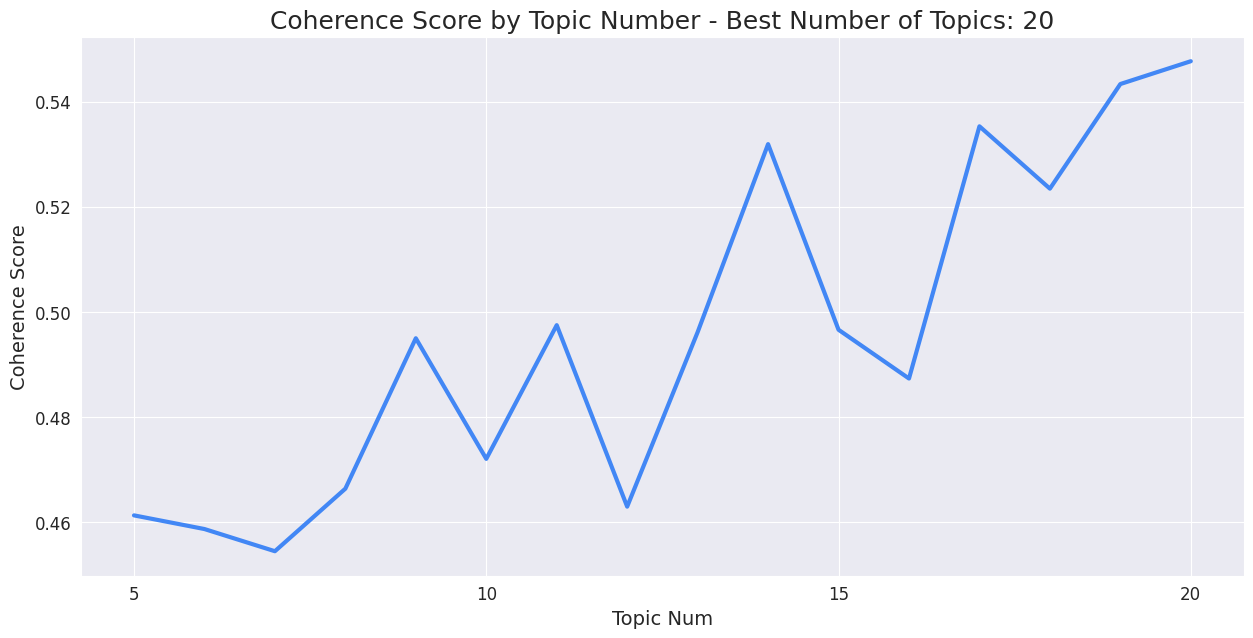

In [45]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = reviews_w_ngrams['token']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 20 + 1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=200,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'

fig.savefig(
    file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [46]:
texts = reviews_w_ngrams['token']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    # n_components=20,
    init='nndsvd',
    max_iter=300,
    l1_ratio=0.0,
    solver='cd',
    # alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [47]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  
# Getting a df with each topic by document
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)
def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 3

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df

,0,1,2,topics
0,family,said,like,family said like
1,democrats,republicans,party,democrats republicans party
2,turkey,migrants,europe,turkey migrants europe
3,company,companies,percent,company companies percent
4,police,officers,officer,police officers officer
5,russia,comey,fbi,russia comey fbi
6,china,north_korea,chinese,china north_korea chinese
7,facebook,twitter,company,facebook twitter company
8,milo,event,protesters,milo event protesters
9,israel,israeli,jerusalem,israel israeli jerusalem


# LDA MODEL****

In [48]:
dictionary = corpora.Dictionary(reviews_w_ngrams['token'])

In [49]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews_w_ngrams['token']]

In [50]:
#Optimize # of k topics
coherence = []
for k in range(5,15):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=20,\
                   iterations=100, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=reviews_w_ngrams['token'],
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14


In [ ]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

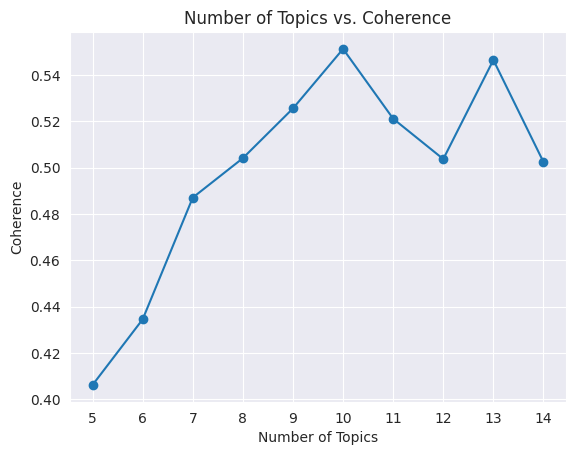

In [52]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [54]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary, passes=20,\
               iterations=100,  chunksize = 10000, eval_every = None, random_state=0)

In [55]:
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=13, id2word = dictionary, passes=20,\
               iterations=100,  chunksize = 10000, eval_every = None, random_state=0)

In [56]:
# To show initial topics
ldamodel.show_topics(7, num_words=20, formatted=False)

[(0,
  [('military', 0.003139026),
   ('said', 0.00297339),
   ('government', 0.0028140745),
   ('country', 0.002802061),
   ('russia', 0.0026674923),
   ('china', 0.0026301502),
   ('israel', 0.0026171326),
   ('iran', 0.0025369527),
   ('syria', 0.002445538),
   ('attack', 0.0022802567),
   ('europe', 0.0021738496),
   ('united_states', 0.0021567196),
   ('north_korea', 0.0020184673),
   ('turkey', 0.0020030611),
   ('group', 0.0018074886),
   ('war', 0.0017409244),
   ('france', 0.001636963),
   ('attacks', 0.0016278356),
   ('britain', 0.0016240386),
   ('iraq', 0.0015919976)]),
 (1,
  [('government', 0.0023824966),
   ('law', 0.00238213),
   ('state', 0.002273092),
   ('program', 0.0020211618),
   ('percent', 0.001897771),
   ('said', 0.0018460982),
   ('united_states', 0.0017724812),
   ('workers', 0.0017124828),
   ('economy', 0.0017102214),
   ('policy', 0.0016685053),
   ('states', 0.0015497027),
   ('plan', 0.0015381087),
   ('congress', 0.0015360785),
   ('new', 0.0014935855

In [57]:
# To show initial topics
lda7topics = pd.DataFrame(ldamodel.show_topics(7, num_words=20, formatted=False))

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

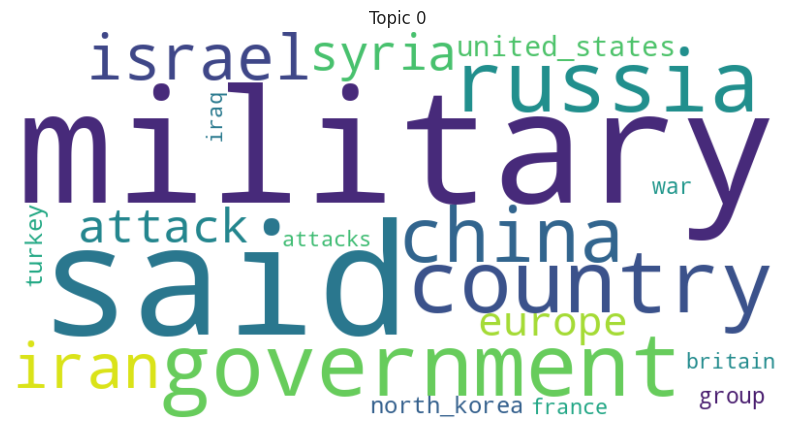

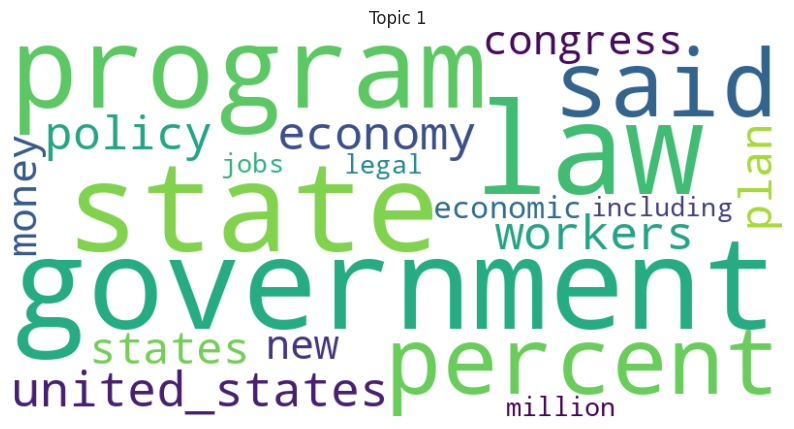

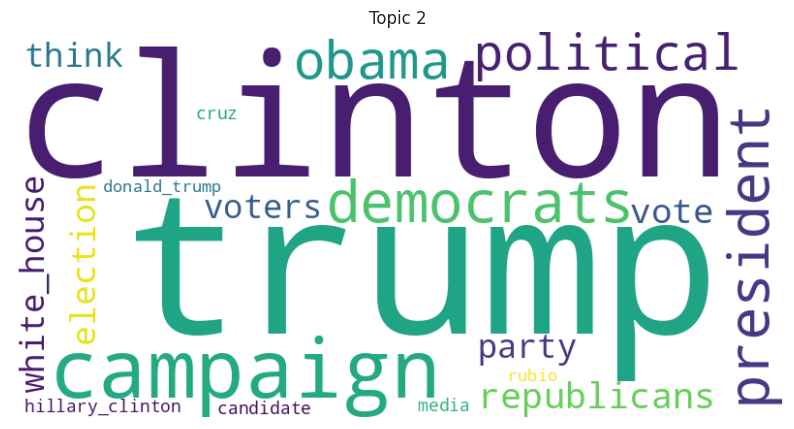

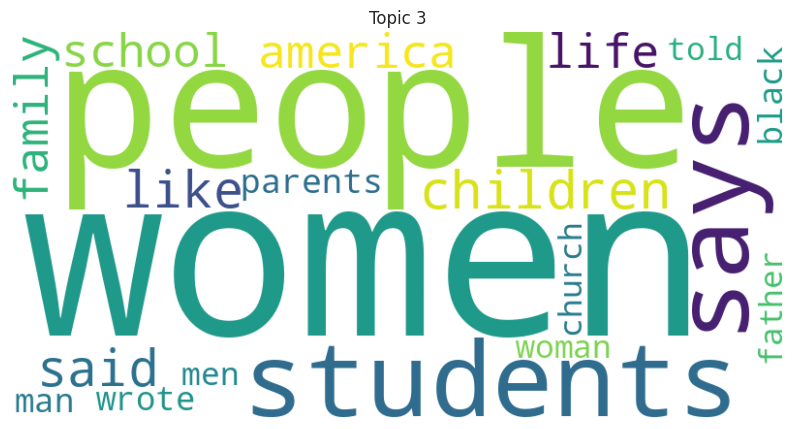

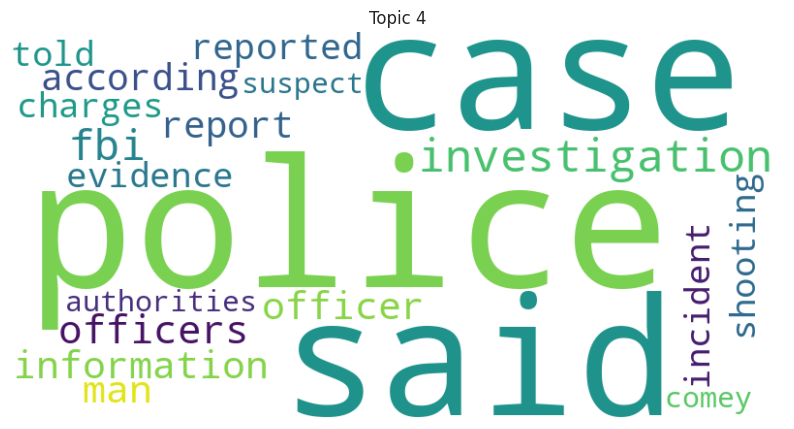

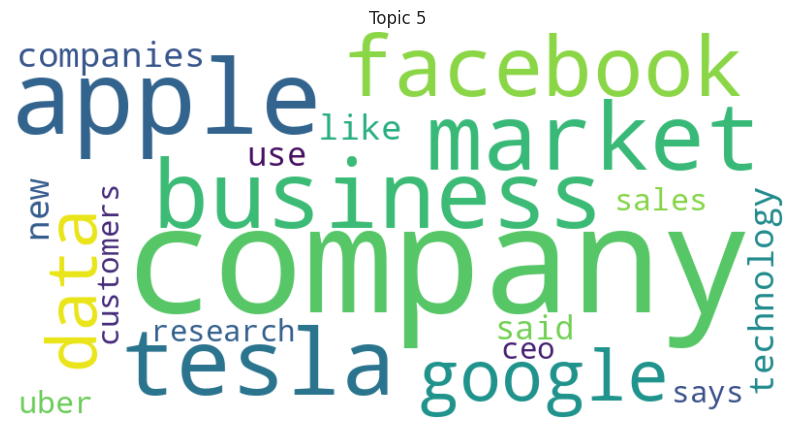

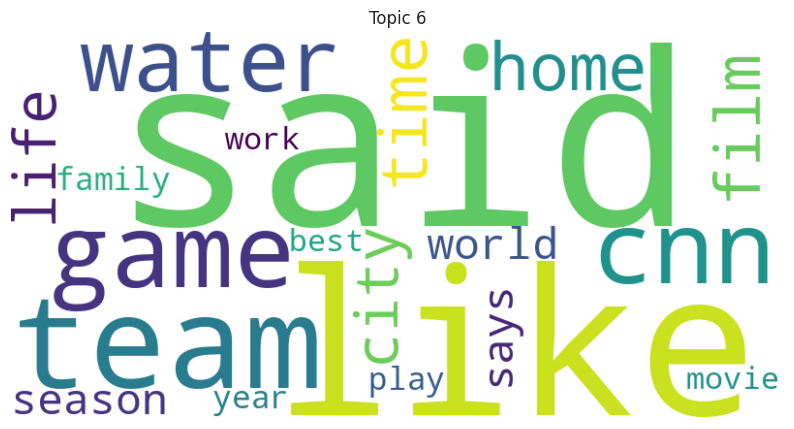

In [59]:
for index in range(7):


  # Generate word cloud for the topic
    topic_words_dict = {word: score for word, score in lda7topics[1][index]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words_dict)

  # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {index}')
    plt.show()

In [60]:
topic_scores = pd.DataFrame(ldamodel[doc_term_matrix])

In [61]:
topic_scores.to_csv("topic_scores_3.csv")

In [62]:
# To show initial topics
ldamodel2.show_topics(13, num_words=15, formatted=False)

[(0,
  [('military', 0.004059971),
   ('israel', 0.0035847267),
   ('iran', 0.0034499317),
   ('country', 0.0033166017),
   ('syria', 0.003316182),
   ('government', 0.0033121104),
   ('said', 0.0028225565),
   ('north_korea', 0.0027536724),
   ('turkey', 0.0027268084),
   ('attack', 0.0025987586),
   ('united_states', 0.0024971415),
   ('europe', 0.0024853027),
   ('war', 0.002339809),
   ('group', 0.0023041945),
   ('france', 0.0021430417)]),
 (1,
  [('china', 0.0051166327),
   ('government', 0.0028001703),
   ('economy', 0.0026583192),
   ('percent', 0.0026499876),
   ('program', 0.0025820795),
   ('money', 0.0025715209),
   ('workers', 0.0025024216),
   ('million', 0.002475893),
   ('united_states', 0.0024131255),
   ('economic', 0.0023082914),
   ('jobs', 0.00214444),
   ('state', 0.0020587437),
   ('chinese', 0.0020533605),
   ('new', 0.0020256857),
   ('companies', 0.0019558978)]),
 (2,
  [('vote', 0.0051145516),
   ('campaign', 0.0051023294),
   ('democrats', 0.0050076577),
   

In [63]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

In [64]:
#To extract the words for a given lambda:
topic_data2 =  pyLDAvis.gensim_models.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

In [65]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,8): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [66]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9
Topic 1,trump,clinton,campaign,democrats,republicans,election,voters,hillary_clinton,vote,obama
Topic 2,game,team,water,film,said,season,movie,home,players,like
Topic 3,women,students,church,parents,children,school,black,people,life,woman
Topic 4,law,workers,program,economy,percent,state,government,tax,economic,states
Topic 5,military,israel,iran,syria,north_korea,turkey,europe,russia,china,government
Topic 6,police,investigation,fbi,officers,case,officer,comey,information,charges,suspect
Topic 7,company,apple,tesla,google,technology,market,facebook,uber,sales,data
